<a href="https://colab.research.google.com/github/Ashutosh-Bahet/Loan-Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline
sns.set_theme(color_codes=True, style='darkgrid',
              palette='deep', font='sans-serif')

In [ ]:
!git --version


git version 2.34.1


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
df=pd.read_csv('/content/Training Data.csv')
df.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.CITY.value_counts()

,count
CITY,
Vijayanagaram,1259
Bhopal,1208
Bulandshahr,1185
Saharsa[29],1180
Vijayawada,1172
...,...
Ujjain,486
Warangal[11][12],459
Bettiah[33],457


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Id,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0


<ipython-input-7-3e3c2ed4bb93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

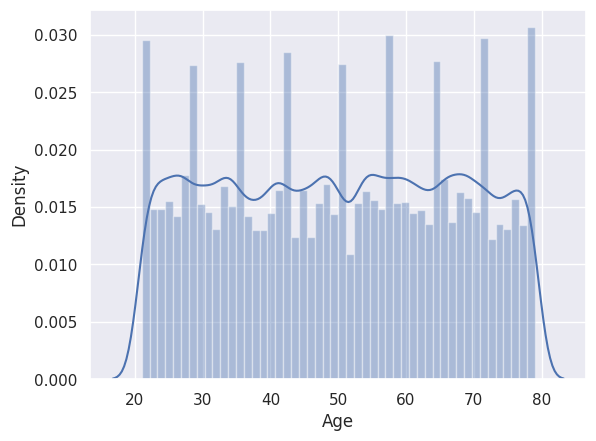

In [ ]:
sns.distplot(a=df["Age"])

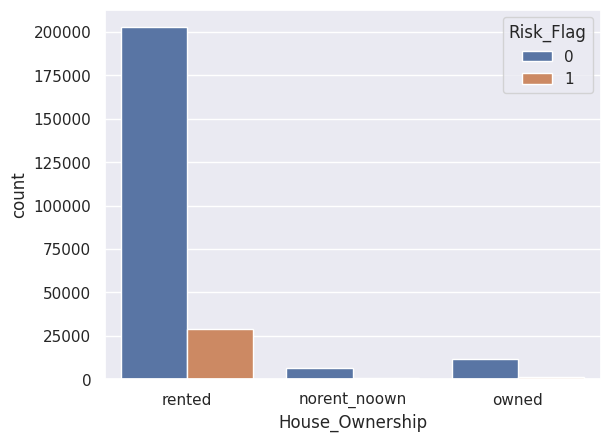

In [ ]:
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=df);

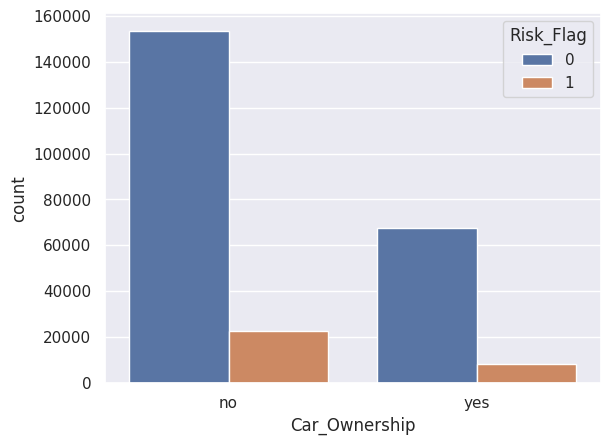

In [ ]:
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=df);

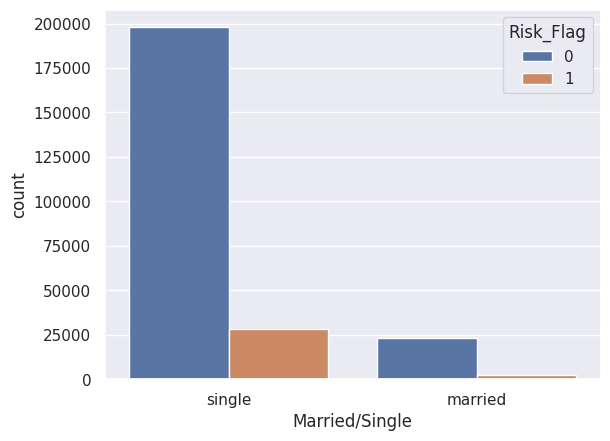

In [ ]:
sns.countplot(x='Married/Single', hue='Risk_Flag', data=df);

<ipython-input-11-15dfd5b51049>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["Income"]);


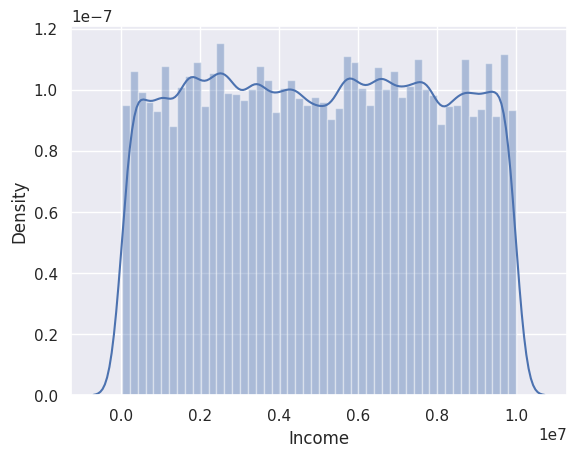

In [ ]:
sns.distplot(a=df["Income"]);

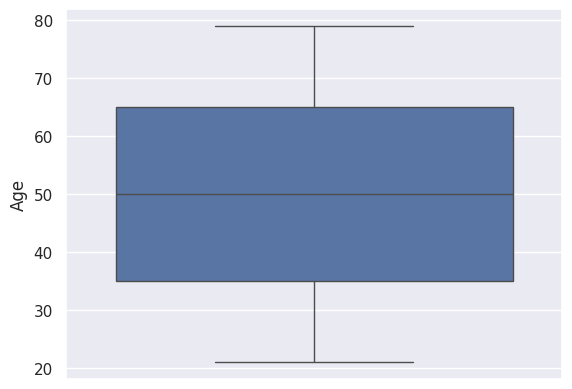

In [ ]:
sns.boxplot(y = 'Age', data = df);

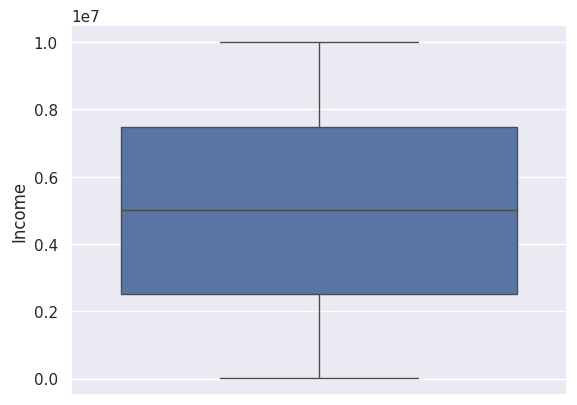

In [ ]:
sns.boxplot(y = 'Income', data = df);

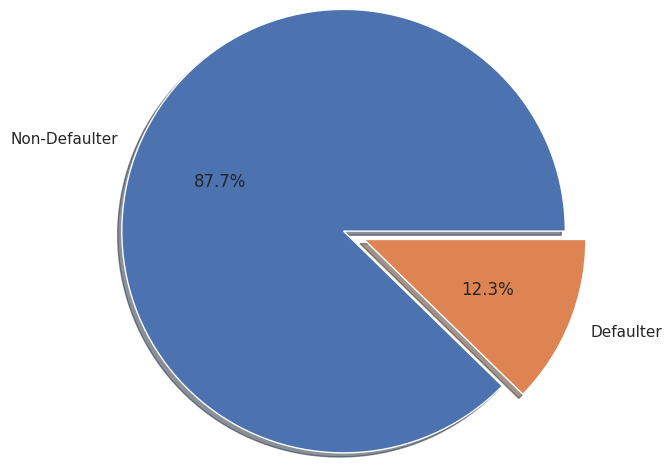

In [ ]:
r = df.groupby('Risk_Flag')['Risk_Flag'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['Non-Defaulter', 'Defaulter'], radius=1.5, autopct='%1.1f%%',  shadow=True);

In [ ]:
print(len(df.Profession.unique()))
print(len(df.STATE.unique()))
print(len(df.CITY.unique()))

51
29
317


In [ ]:
def chi_square_test(data):
    stat, p, dof, expected = chi2_contingency(data)
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')


In [ ]:
car_ownership_risk_flag = pd.crosstab(df["Car_Ownership"], df["Risk_Flag"])
car_ownership_risk_flag
chi_square_test(car_ownership_risk_flag)

marital_status_risk_flag = pd.crosstab(df["Married/Single"], df["Risk_Flag"])
marital_status_risk_flag
chi_square_test(marital_status_risk_flag)

house_ownership_risk_flag = pd.crosstab(df["House_Ownership"], df["Risk_Flag"])
house_ownership_risk_flag
chi_square_test(house_ownership_risk_flag)


p value is 1.7350853850183746e-33
Dependent (reject H0)
p value is 3.773053705715196e-26
Dependent (reject H0)
p value is 1.8381930028370595e-40
Dependent (reject H0)


In [ ]:
features = ['Married/Single','Car_Ownership','Profession','CITY','STATE','House_Ownership']
label_encoder = LabelEncoder()

for col in features:
    df[col] = label_encoder.fit_transform(df[col])

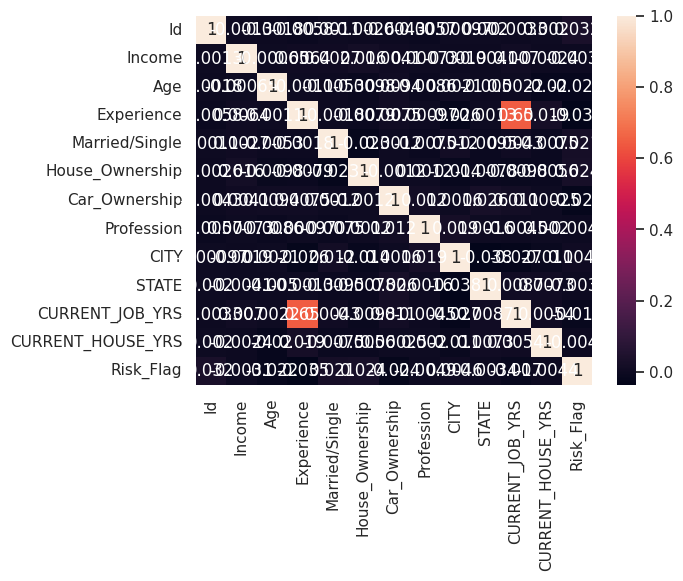

In [ ]:
sns.heatmap(df.corr(), annot=True);

In [ ]:
features = ["CURRENT_JOB_YRS","Experience"]

df_for_pca = df[features]
scaled_df_for_pca = (df_for_pca - df_for_pca.mean(axis=0))/df_for_pca.std()
scaled_df_for_pca

,CURRENT_JOB_YRS,Experience
0,-0.914129,-1.180230
1,0.731035,-0.014067
2,-0.639935,-1.013635
3,-1.188323,-1.346825
4,-0.914129,0.152528
...,...,...
251995,-0.091547,0.485718
251996,-0.091547,-0.014067
251997,0.182647,-0.513851
251998,-1.736711,-1.680014


In [ ]:
pca = PCA()
df_pca = pca.fit_transform(scaled_df_for_pca)
component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=component_names)

df_pca.head()

,PC1,PC2
0,-1.480935,-0.188162
1,0.506973,-0.526866
2,-1.169251,-0.264246
3,-1.792620,-0.112078
4,-0.538533,0.754240


In [ ]:
df1 = pd.concat([df,df_pca],axis=1)
df1.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,PC1,PC2
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0,-1.480935,-0.188162
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0,0.506973,-0.526866
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0,-1.169251,-0.264246
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1,-1.792620,-0.112078
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1,-0.538533,0.754240


In [ ]:
df1.drop(["Id"],axis=1,inplace=True)

In [ ]:
X = df1.drop(['Risk_Flag'],axis=1)
y = df1.Risk_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
sm = SMOTE(random_state = 500)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000000)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8774867724867725

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8600529100529101

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=420)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8815079365079365

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy",random_state=420)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8640079365079365

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1,n_estimators=1000,use_label_encoder=False,random_state=420)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:13:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.8904497354497355

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=15000)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.5475529100529101

In [ ]:
!git clone https://github.com/Ashutosh-Bahet/Loan-Prediction.git


Cloning into 'Loan-Prediction'...
fatal: could not read Username for 'https://github.com': No such device or address
